In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
csv_file = "/Users/robertjost/Fall_2025/Biogeochemistry/extract_results.csv"

In [5]:
extract_df = pd.read_csv(csv_file)

In [13]:
extract_df["Pasture_pct"] = (extract_df["Pasture"] / (extract_df["Pasture"] + extract_df["Wheat"]) * 100).round(1)
extract_df["Wheat_pct"]   = (extract_df["Wheat"] / (extract_df["Pasture"] + extract_df["Wheat"]) * 100).round(1)

In [15]:
methods = extract_df.groupby("Method")
pools = extract_df.groupby("Pool")
for name, group in methods:
    display(f"Group: {name}")
    display(group)

'Group: CHCl-released NaHCO3'

,Method,Pool,Pasture,Wheat,Pasture_pct,Wheat_pct
2,CHCl-released NaHCO3,Inorganic,3.8,2.8,57.6,42.4
7,CHCl-released NaHCO3,Organic,4.1,2.2,65.1,34.9


'Group: H2SO4/H2O2'

,Method,Pool,Pasture,Wheat,Pasture_pct,Wheat_pct
10,H2SO4/H2O2,Residual,376.0,261.0,59.0,41.0


'Group: HCl'

,Method,Pool,Pasture,Wheat,Pasture_pct,Wheat_pct
5,HCl,Inorganic,133.0,117.0,53.2,46.8


'Group: NaHCO3'

,Method,Pool,Pasture,Wheat,Pasture_pct,Wheat_pct
1,NaHCO3,Inorganic,29.7,15.4,65.9,34.1
6,NaHCO3,Organic,19.4,12.3,61.2,38.8


'Group: NaOH'

,Method,Pool,Pasture,Wheat,Pasture_pct,Wheat_pct
3,NaOH,Inorganic,23.0,20.3,53.1,46.9
8,NaOH,Organic,107.0,73.0,59.4,40.6


'Group: Resin'

,Method,Pool,Pasture,Wheat,Pasture_pct,Wheat_pct
0,Resin,Inorganic,41.2,23.8,63.4,36.6


'Group: Sonicate-NaOH'

,Method,Pool,Pasture,Wheat,Pasture_pct,Wheat_pct
4,Sonicate-NaOH,Inorganic,12.6,7.8,61.8,38.2
9,Sonicate-NaOH,Organic,22.0,15.0,59.5,40.5


In [11]:
def plot_grouped_bars(
    df,
    category_col,
    group_col,
    value_cols,
    groups_to_plot=None,
    figsize=(12, 5),
    title=None,
    ylabel="Value"
):
    """
    Plot side-by-side bar charts for multiple numeric series by category,
    split into subplots by group. Uses one shared y-axis label.

    Parameters
    ----------
    df : pandas.DataFrame
        Input dataframe containing the data.
    category_col : str
        Column name for the x-axis categories (e.g., 'Method').
    group_col : str
        Column name used to split data into subplots (e.g., 'Pool').
    value_cols : list of str
        List of numeric column names to plot as separate bars per category.
    groups_to_plot : list of str, optional
        Specific group values to plot. If None, all unique groups are used.
    figsize : tuple, optional
        Figure size (width, height). Default is (12, 5).
    title : str, optional
        Overall figure title.
    ylabel : str, optional
        Label for the shared y-axis.

    Returns
    -------
    None
        Displays the matplotlib figure.
    """
    if groups_to_plot is None:
        groups_to_plot = df[group_col].unique()

    n_groups = len(groups_to_plot)
    fig, axes = plt.subplots(1, n_groups, figsize=figsize, sharey=True)

    # Ensure axes is iterable
    if n_groups == 1:
        axes = [axes]

    width = 0.8 / len(value_cols)  # adjust bar width based on number of series

    for ax, group_value in zip(axes, groups_to_plot):
        subset = df[df[group_col] == group_value]
        x = np.arange(len(subset))

        # Plot each numeric column as a bar series
        for i, col in enumerate(value_cols):
            ax.bar(
                x + (i - len(value_cols)/2) * width + width/2,
                subset[col],
                width,
                label=col
            )

        ax.set_xticks(x)
        ax.set_xticklabels(subset[category_col], rotation=45, ha="right")
        ax.set_title(str(group_value))
        ax.legend()

    # Shared y-axis label
    fig.text(0.04, 0.5, ylabel, va="center", rotation="vertical", fontsize=12)

    if title:
        fig.suptitle(title, fontsize=14, y=1.02)

    plt.tight_layout(rect=[0.05, 0, 1, 1])
    plt.show()

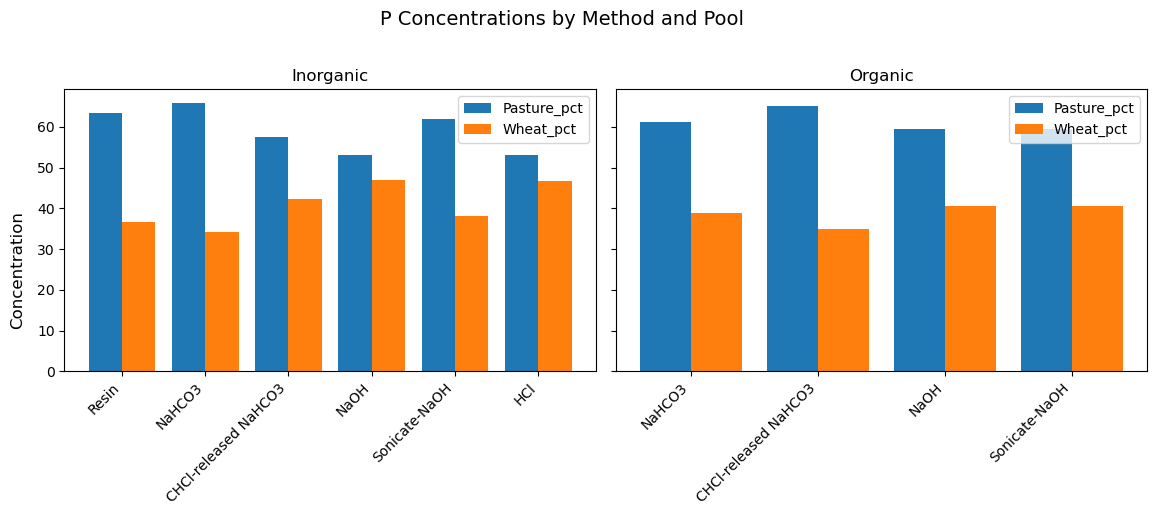

In [ ]:
plot_grouped_bars(
    extract_df,
    category_col="Method",
    group_col="Pool",
    value_cols=["Pasture_pct", "Wheat_pct"],
    groups_to_plot=["Inorganic", "Organic"],
    title="P Concentrations by Method and Pool",
    ylabel="% P "
)

# Part 2

In [ ]:
from IPython.display import display, Markdown

display(Markdown(
    fr"""
Rate of Manganese oxidation: {Mn_oxidation:e} $\,ugMn\,g_{{sed}}^{{-1}}\,yr^{{-1}}$
"""
))


Rate of Manganese oxidation: 2.359935e-06 $\,ugMn\,g_{sed}^{-1}\,yr^{-1}$

